In [2]:
import numpy as np
import os
import csv
import folium
from folium.features import CustomIcon
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

# Case Study

In [5]:
p1 = np.array([5473, 5241, 4996, 4867, 5944, 6071, 5837, 6117, 5998, 6746])
p2 = np.array([5558, 5337, 5149, 4970, 6056, 6197, 6000, 6119, 6052, 6829])
p3 = np.array([5686, 5549, 5327, 5028, 6278, 6381, 6339, 6419, 6457, 7118])
r1 = np.array([784, 661, 742, 778, 799, 669, 949, 730, 822, 830])
r2 = np.array([630, 412, 450, 535, 483, 419, 588, 633, 601, 608])
r3 = np.array([474, 261, 321, 576, 357, 286, 314, 335, 243, 283])

In [15]:
np.mean(r2 - r3)

190.9

# 60 custs

In [2]:
intervals = [[489833, 490723], [494250, 494925], [494807, 495792], [495680, 496368], [496134, 496620], [496302, 496695], [496657, 497243]]

C:\Users\atevs\AppData\Local\Temp\ipykernel_8836\2751243410.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((intervals[i][0]/1000, intervals[i][1]/1000), (i, i), 'ro-', color="#990000")


Text(0, 0.5, '# stores')

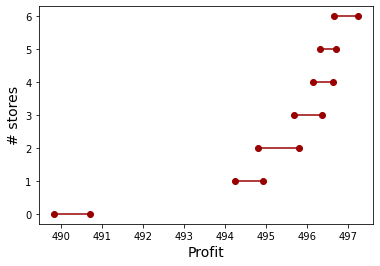

In [27]:
#fig, ax = plt.subplots(figsize=(12, 7))
#plt.plot([x[0] for x in intervals], range(7), linestyle="--", color="black")
#plt.plot([x[1] for x in intervals], range(7), linestyle="--")
for i in range(7):
    plt.plot((intervals[i][0]/1000, intervals[i][1]/1000), (i, i), 'ro-', color="#990000")
plt.yticks(range(7))
plt.xlabel("Profit", fontsize=14)
plt.ylabel("# stores", fontsize=14)

C:\Users\atevs\AppData\Local\Temp\ipykernel_22944\3329506149.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((i, i), (intervals[i][0], intervals[i][1]), 'ro-', color="#990000")


Text(0.5, 0, '# stores')

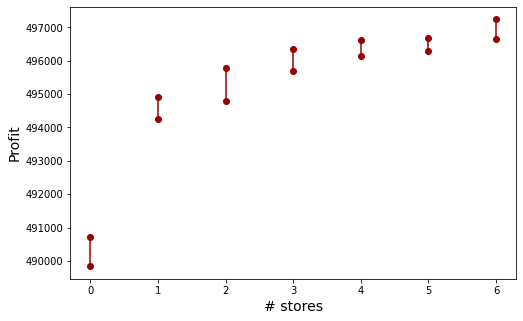

In [9]:
fig,ax = plt.subplots(figsize=(8, 5))
for i in range(7):
    plt.plot((i, i), (intervals[i][0], intervals[i][1]), 'ro-', color="#990000")
plt.xticks(range(7))
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)

In [3]:
rcosts = [16873, 7467, 7206, 6901, 6670, 6805, 7069]
spent = [0, 4367, 4072, 3504, 3280, 2976, 2359]

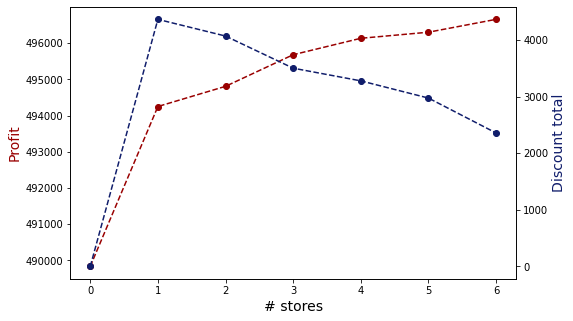

In [4]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(8, 5))
# make a plot
ax.plot(range(7), [x[0] for x in intervals], color="#990000", marker="o", linestyle="--")
# set x-axis label
ax.set_xlabel("# stores", fontsize = 14)
# set y-axis label
ax.set_ylabel("Profit", color="#990000", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(7), spent, color="#101D6B", marker="o", linestyle="--")
ax2.set_ylabel("Discount total",color="#101D6B",fontsize=14)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

In [5]:
pprods = [70.5, 70.5, 73.2, 79.5, 79.5, 78.6]
pcusts = [70, 68.3, 71.7, 76.7, 78.3, 78.3]
pcustfull = [68.3, 66.7, 70, 75, 76.7, 76.6]

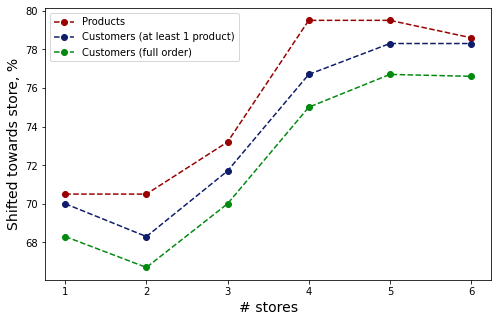

In [6]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 7), pprods, linestyle="--", marker="o", color="#990000", label="Products")
plt.plot(range(1, 7), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers (at least 1 product)")
plt.plot(range(1, 7), pcustfull, linestyle="--", marker="o", color="#028A0F", label="Customers (full order)")
plt.ylabel("Shifted towards store, %", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

In [7]:
lonRouts = [8884, 6273, 6216, 6103, 5872, 5870, 6133]
rCosts = [16873, 7467, 7206, 6901, 6670, 6805, 7068]

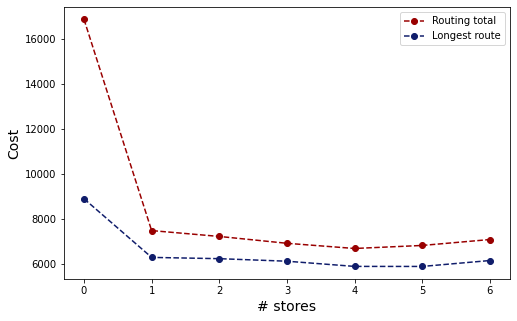

In [8]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(7), rCosts, linestyle="--", marker="o", color="#990000", label="Routing total")
plt.plot(range(7), lonRouts, linestyle="--", marker="o", color="#101D6B", label="Longest route")
plt.ylabel("Cost", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

# 40 custs

In [1]:
profits = [318382, 324980, 325278, 325618, 325954, 325960]

C:\Users\atevs\AppData\Local\Temp\ipykernel_15448\757800703.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(6), profits, 'ro-', color="#990000")


Text(0.5, 0, '# stores')

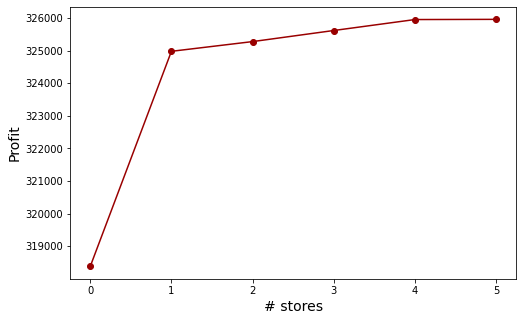

In [4]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(6), profits, 'ro-', color="#990000")
plt.xticks(range(6))
plt.ylabel("Profit", fontsize=14)
plt.xlabel("# stores", fontsize=14)

In [5]:
rcosts = [15554, 7416.25, 7079.98, 6702.34, 6467.08, 6467.08]
spent = [0, 1540, 1579, 1616, 1515, 1509]

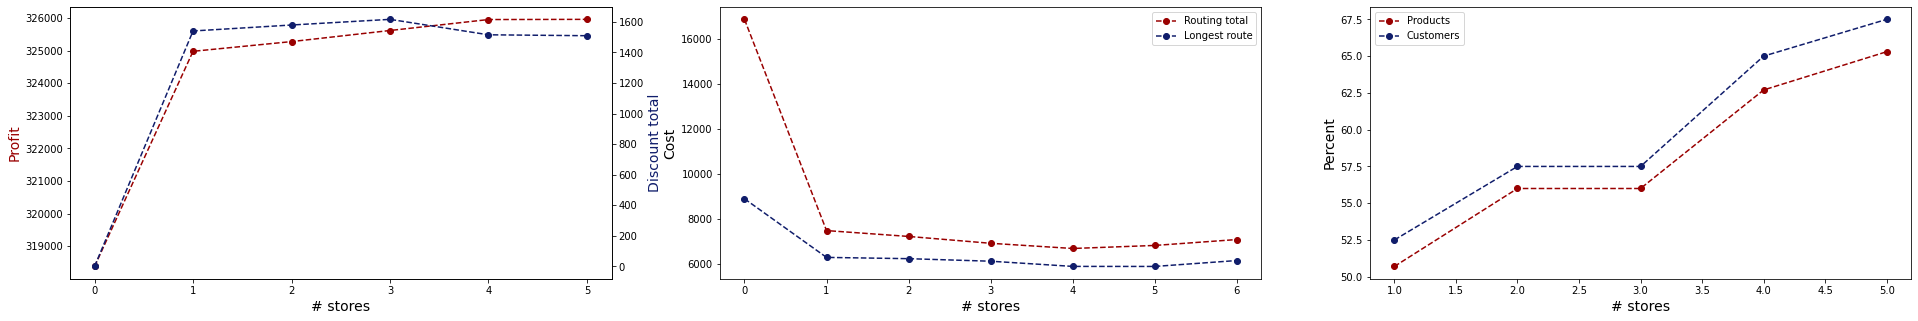

In [29]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(1, 3, figsize=(33, 5))
# make a plot
ax[0].plot(range(6), profits, color="#990000", marker="o", linestyle="--")
# set x-axis label
ax[0].set_xlabel("# stores", fontsize = 14)
# set y-axis label
ax[0].set_ylabel("Profit", color="#990000", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax[0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(6), spent, color="#101D6B", marker="o", linestyle="--")
ax2.set_ylabel("Discount total",color="#101D6B",fontsize=14)
ax[1].plot(range(7), rCosts, linestyle="--", marker="o", color="#990000", label="Routing total")
ax[1].plot(range(7), lonRouts, linestyle="--", marker="o", color="#101D6B", label="Longest route")
ax[1].set_ylabel("Cost", fontsize=14)
ax[1].set_xlabel("# stores", fontsize=14)
ax[1].legend()
ax[2].plot(range(1, 6), pprods, linestyle="--", marker="o", color="#990000", label="Products")
ax[2].plot(range(1, 6), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers")
ax[2].set_xlabel("# stores", fontsize=14)
ax[2].set_ylabel("Percent", fontsize=14)
#ax[2].set(xlabel='# stores', ylabel='Percent')
ax[2].legend()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

In [9]:
pprods = [50.7, 56, 56, 62.7, 65.3]
pcusts = [52.5, 57.5, 57.5, 65, 67.5]
pcustfull = [52.5, 57.5, 57.5, 65, 67.5]

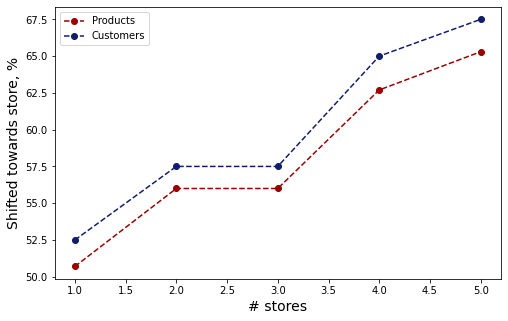

In [12]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 6), pprods, linestyle="--", marker="o", color="#990000", label="Products")
plt.plot(range(1, 6), pcusts, linestyle="--", marker="o", color="#101D6B", label="Customers")
plt.ylabel("Shifted towards store, %", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

In [25]:
lonRouts = [8884, 6273, 6216, 6103, 5872, 5870, 6133]
rCosts = [16873, 7467, 7206, 6901, 6670, 6805, 7068]

In [35]:
(8884 - 6133)/8884

0.30965781179648805

In [33]:
(16873/3 - 7068/2)/16873

0.12388628775756137

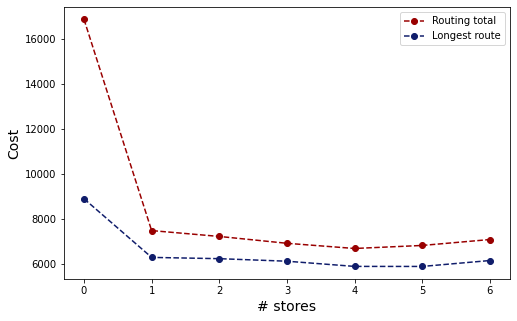

In [ ]:
fig,ax = plt.subplots(figsize=(8, 5))
plt.plot(range(7), rCosts, linestyle="--", marker="o", color="#990000", label="Routing total")
plt.plot(range(7), lonRouts, linestyle="--", marker="o", color="#101D6B", label="Longest route")
plt.ylabel("Cost", fontsize=14)
plt.xlabel("# stores", fontsize=14)
plt.legend()

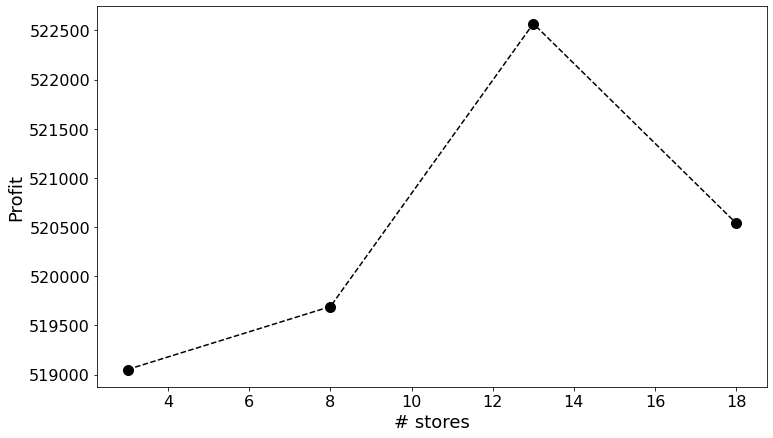

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
#plt.xlim([0, 20])
#plt.ylim([0, 3700])
ax.set_xlabel("# stores", fontsize=18)
ax.set_ylabel("Profit", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot([3, 8, 13, 18], profits, linestyle="--", marker="o", color="black", markersize=10)

# Old

In [3]:
file = "..\..\data\TSP_instance_n_10_s_1.dat"
f = open(file, 'r')
n = int(f.readline())
points = [[], []]

for line in f:
    coords = line.split()
    points[0].append(float(coords[0]))
    points[1].append(float(coords[1]))

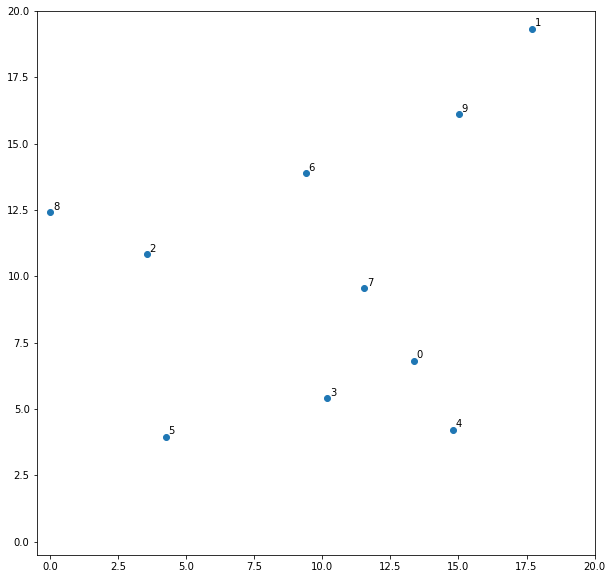

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim([-0.5, 20])
plt.ylim([-0.5, 20])
plt.plot(points[0], points[1], "o")
for i in range(len(points[0])):
    plt.annotate(i, (points[0][i] + 0.1, points[1][i] + 0.1))

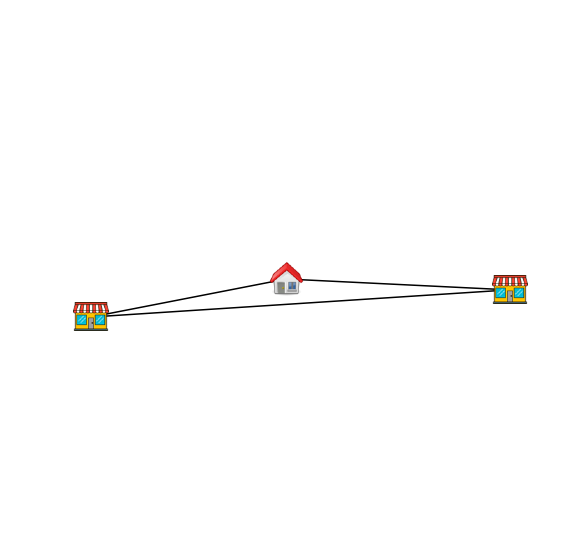

In [13]:
home = OffsetImage(plt.imread("..\\..\\modelling\\img\\home.png"), zoom=0.7)
store = OffsetImage(plt.imread("..\\..\\modelling\\img\\store.png"), zoom=0.7)
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
ab = AnnotationBbox(home, (0, 0), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(store, (-3.5, -0.7), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(store, (4, -0.2), frameon=False)
ax.add_artist(ab)
plt.plot([0, 4], [0, -0.2], color="black")
plt.plot([0, -3.5], [0, -0.7], color="black")
plt.plot([-3.5, 4], [-0.7, -0.2], color="black")


In [14]:
with open("D:\\Study\\Ph.D\\Projects\\Bilevel Optimization\\data\\results\\stats_p200.csv", "w", encoding="utf-16") as f1:
    out_f = csv.writer(f1, lineterminator="\n")
    out_f.writerow(["Instance", "Profit", "Routing Cost", "Runtime", "Gap"])
    for file in os.listdir("D:\\Study\\Ph.D\\Projects\\Bilevel Optimization\\data\\results\\output\p200"):
        fl = open("D:\\Study\\Ph.D\\Projects\\Bilevel Optimization\\data\\results\\output\\p200\\" + file, "r")
        lines = fl.readlines()
        out_f.writerow(lines[1].split(" , "))
        fl.close()

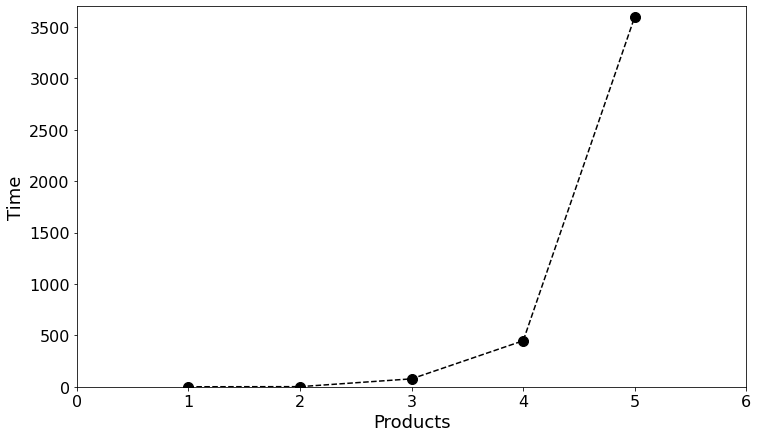

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xlim([0, 6])
plt.ylim([0, 3700])
ax.set_xlabel("Products", fontsize=18)
ax.set_ylabel("Time", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, 6), [0.42, 1.46, 77.41, 448.03, 3600.14], linestyle="--", marker="o", color="black", markersize=10)

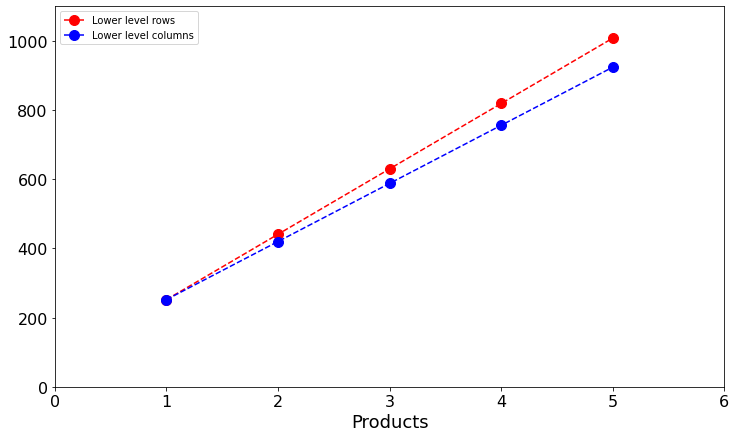

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xlim([0, 6])
plt.ylim([0, 1100])
ax.set_xlabel("Products", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, 6), [252, 441, 630, 819, 1008], linestyle="--", marker="o", color="red", markersize=10, label="Lower level rows")
plt.plot(range(1, 6), [252, 420, 588, 756, 924], linestyle="--", marker="o", color="blue", markersize=10, label="Lower level columns")
plt.legend()